## This notebook explains how to fit a polynomial model to data using the **least squares** method

---

Lets say we start with our data points:

$\boldsymbol{X} =[x_1,x_2,...,x_N]^T$

$\boldsymbol{T} =[t_1,t_2,...,t_N]^T$

$\boldsymbol{Y} =[y_1,y_2,...,y_N]^T$

- \( X \): input observations (independent variable)
- \( T \): target values (dependent variable)
- \( Y \): estimated values predicted by the model

### We assume that the relationship between \( x \) and \( t \) can be modeled by a polynomial of degree \( M \):

$y(x,\boldsymbol{W})= w_0 + w_1x +w_2x^2+...+w_mx^m = \sum^M_{j=0}w_jx^j$

$\boldsymbol{W} =[w_1,w_2,...,w_M]^T$

$\boldsymbol{W}$, Weights (*i.e.*, what our model learns)

### To measure how well the polynomial fits the data, we use the **sum of squared errors** (quadratic cost function):

$E(\boldsymbol{W})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{W})-t_n\}^2$

The goal is to find \( W \) that minimizes \( E(W) \).

### Computing the derivative of the cost function and making it equal to zero, we can find the vector **W*** that minimizes the error:
$ \boldsymbol{W}^* = (\boldsymbol{A}^T\boldsymbol{A})^{-1}\boldsymbol{A} ^T\boldsymbol{T}$

Where **A** is defined by:

$$\boldsymbol{A} = \begin{bmatrix}
    1 & x_{1} & x_{1}^2 & \dots  & x_{1}^M \\
    1 & x_{2} & x_{2}^2 & \dots  & x_{2}^M \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{N} & x_{N}^2 & \dots  & x_{N}^M
\end{bmatrix}$$

In [14]:
%matplotlib inline 
import numpy as np 
import matplotlib.pylab as plt 

from ipywidgets import *

Creating Data Set

In [2]:
noise = 0.2 

N = 25
x = np.linspace(0, 1, N) 
y_noiseless = np.sin(2*np.pi*x) 
y = y_noiseless + np.random.normal(0, noise, N)

Plot entire data set with and without noise

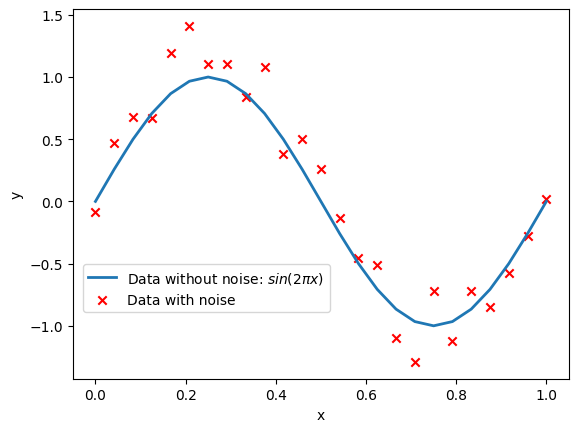

In [3]:
plt.figure()
plt.plot(x,y_noiseless,linewidth = 2.0,label = r'Data without noise: $sin(2 \pi x)$')
plt.scatter(x,y,color ='red', marker = 'x', label = r'Data with noise')
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
np.random.seed(seed = 2)
indexes = np.arange(N, dtype =int)

np.random.shuffle(indexes)

train_size = 15
val_size = 5
test_size = 5

# Training set, validation set and test set are created by slicing the shuffled indexes array

aux = indexes[:train_size]
aux = np.sort(aux)
x_train = x[aux]
y_train = y[aux]
print("Training set: ", aux)
print(x_train, y_train)

aux = indexes[train_size: train_size + val_size]
aux = np.sort(aux)
x_val= x[aux]
y_val = y[aux]
print("Validation set: ", aux)
print(x_val, y_val)

aux = indexes[-test_size:]
aux = np.sort(aux)
x_test = x[aux]
y_test = y[aux]
print("Test set: ", aux)
print(x_test, y_test)

Training set:  [ 0  1  3  4  5  6  9 10 12 14 16 17 19 22 23]
[0.         0.04166667 0.125      0.16666667 0.20833333 0.25
 0.375      0.41666667 0.5        0.58333333 0.66666667 0.70833333
 0.79166667 0.91666667 0.95833333] [-0.08681759  0.46845386  0.66919846  1.19562984  1.41061829  1.10585654
  1.078776    0.38364703  0.26306558 -0.45604436 -1.09830523 -1.29022146
 -1.12138405 -0.57872059 -0.27753368]
Validation set:  [ 2  7 18 20 21]
[0.08333333 0.29166667 0.75       0.83333333 0.875     ] [ 0.68195196  1.10544896 -0.7221838  -0.72223373 -0.84749145]
Test set:  [ 8 11 13 15 24]
[0.33333333 0.45833333 0.54166667 0.625      1.        ] [ 0.83772336  0.50203397 -0.13550881 -0.50905862  0.01656061]


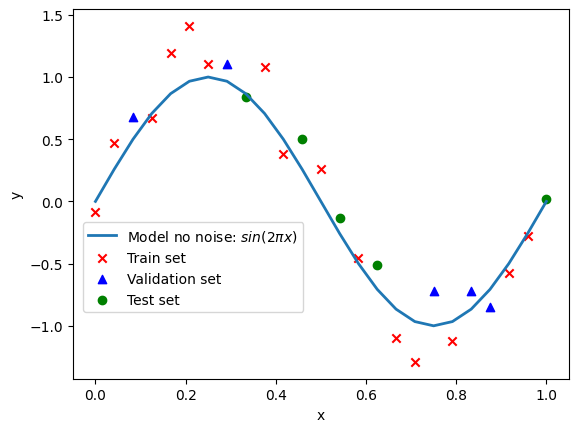

In [9]:
plt.figure()
plt.plot(x,y_noiseless,linewidth = 2.0,label = r'Model no noise: $sin(2 \pi x)$')
plt.scatter(x_train,y_train,color ='red', marker = 'x', label = "Train set")
plt.scatter(x_val,y_val,color = 'blue',marker = '^' , label = "Validation set")
plt.scatter(x_test,y_test,color = 'green', marker = 'o', label = "Test set")
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

If the matrix \( A^T A \) is invertible, then the **Moore–Penrose pseudoinverse** of \( A \) is defined as:

$
A^+ = (A^T A)^{-1} A^T
$

So, mathematically:

$
A^+ = (A^T A)^{-1} A^T
$

That means the least squares solution can be written as:

$
W = A^+ T
$

which is exactly the same as:

$
W = (A^T A)^{-1} A^T T
$

In [11]:
#Least squares polynomial fitting solution

def polynomial_fit(X,T,M):
    A = np.power(X.reshape(-1,1),np.arange(0,M+1).reshape(1,-1))
    T = T.reshape(-1,1)
    W = np.dot(np.linalg.pinv(A),T) #Moore–Penrose pseudoinverse of matrix A
    return W.ravel()

In [15]:
def plotmodel(M):
    coefs = polynomial_fit(x_train, y_train, M)[::-1]
    print("Weights:\n", coefs)
    p = np.poly1d(coefs)
    plt.figure()
    plt.plot(x,y_noiseless,linewidth = 1.5,label = r'Data no noise: $sin(2 \pi x)$')
    plt.scatter(x_train,y_train,color='red',label= "Train set")
    plt.xlabel("x")
    plt.ylabel(r'y')
    y_fit = p(x_train) 
    plt.plot(x_train,y_fit,linewidth = 1.0,label ="Polynomial Fit")
    plt.legend(loc=(0.02,0.02))
    plt.show()

interact(plotmodel,M=(0,9,1)) 

interactive(children=(IntSlider(value=4, description='M', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.plotmodel(M)>